In [1]:
import pandas as pd
import numpy as np
import requests
import warnings

# settings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
#import necessary imports

/Users/kevinliu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
def get_listings(api_key, listing_url):
    url = "https://app.scrapeak.com/v1/scrapers/zillow/listing"

    querystring = {
        "api_key": api_key,
        "url":listing_url
    }

    return requests.request("GET", url, params=querystring)

def get_property_detail(api_key, zpid):
    url = "https://app.scrapeak.com/v1/scrapers/zillow/property"

    querystring = {
        "api_key": api_key,
        "zpid":zpid
    }

    return requests.request("GET", url, params=querystring)

def get_zpid(api_key, street, city, state, zip_code=None):
    url = "https://app.scrapeak.com/v1/scrapers/zillow/zpidByAddress"

    querystring = {
        "api_key": api_key,
        "street": street,
        "city": city,
        "state": state,
        "zip_code":zip_code
    }

    return requests.request("GET", url, params=querystring)

In [3]:

# get key
api_key = "dbfffb7d-3768-478e-b9d2-a45faf8ef1ce"

In [4]:

# zillow search url
listing_url = "INPUT LINK HERE"
listing_response = get_listings(api_key, listing_url)
listing_response.json().keys()
# check if request is successful
listing_response.json()["is_success"]

False

In [5]:
num_of_properties = listing_response.json()["data"]["categoryTotals"]["cat1"]["totalResultCount"]
print("Count of properties:", num_of_properties)

KeyError: 'categoryTotals'

In [6]:
# view all listings
df_listings = pd.json_normalize(listing_response.json()["data"]["cat1"]["searchResults"]["mapResults"])
print("Number of rows:", len(df_listings))
print("Number of columns:", len(df_listings.columns))
df_listings

KeyError: 'cat1'

In [17]:
from sklearn.model_selection import train_test_split
import pandas as pd

home_data = pd.read_csv("/Users/kevinliu/Desktop/zillowHousePredictionProject/merged_data.csv")
home_data = home_data.replace({'\$': ''}, regex=True)
home_data = home_data.replace({',': ''}, regex=True)





home_data['price'] = home_data['price'].str.extract(r'(\d+)')

# Convert the column to integer
home_data['price'] = home_data['price'].astype(int)


features = ['price', 'beds', 'baths', 'area', 'timeOnZillow', 'hdpData.homeInfo.livingArea','latLong.latitude', 'latLong.longitude','hdpData.homeInfo.zestimate', 'hdpData.homeInfo.taxAssessedValue']



home_data = home_data[features]
home_data = home_data.dropna()


y = home_data.price


# Create X (After completing the exercise, you can return to modify this line!)

features = ['beds', 'baths', 'area', 'timeOnZillow', 'hdpData.homeInfo.livingArea', 'latLong.latitude', 'latLong.longitude', 'hdpData.homeInfo.zestimate', 'hdpData.homeInfo.taxAssessedValue']

# Select columns corresponding to features, and preview the data
X = home_data[features]



print(len(X))
print(len(y))

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)


# Split into validation and training data
# train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)


5192
5192


In [18]:

# Check for NaNs in input data
if isinstance(train_X, (pd.Series, pd.DataFrame)):
    print(train_X.isna().sum())
else:
    print(np.isnan(train_X).sum())

beds                                 0
baths                                0
area                                 0
timeOnZillow                         0
hdpData.homeInfo.livingArea          0
latLong.latitude                     0
latLong.longitude                    0
hdpData.homeInfo.zestimate           0
hdpData.homeInfo.taxAssessedValue    0
dtype: int64


In [19]:
train_X.describe()

,beds,baths,area,timeOnZillow,hdpData.homeInfo.livingArea,latLong.latitude,latLong.longitude,hdpData.homeInfo.zestimate,hdpData.homeInfo.taxAssessedValue
count,3894.000000,3894.000000,3894.000000,3.894000e+03,3894.000000,3894.000000,3894.000000,3.894000e+03,3.894000e+03
mean,3.495378,2.571135,2252.661274,1.641199e+09,2252.661274,38.845750,-93.858890,6.077376e+05,3.902233e+05
std,1.063537,1.163248,1421.844983,3.421223e+09,1421.844983,5.326635,14.919457,1.211032e+06,6.940055e+05
min,0.000000,0.000000,0.000000,-2.868960e+08,0.000000,26.424732,-123.790504,3.380000e+04,8.750000e+02
25%,3.000000,2.000000,1476.000000,2.315040e+08,1476.000000,34.426070,-103.867131,2.764000e+05,1.669250e+05
50%,3.000000,2.000000,1943.500000,3.579905e+08,1943.500000,38.739465,-91.373015,4.031500e+05,2.824000e+05
75%,4.000000,3.000000,2634.750000,1.437174e+09,2634.750000,43.435074,-80.810061,6.191500e+05,4.370568e+05
max,22.000000,16.000000,25939.000000,3.353521e+10,25939.000000,48.962498,-70.641900,2.510930e+07,1.690020e+07


In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense, BatchNormalization
model = keras.Sequential([
    Input(shape = (9,)),
    layers.BatchNormalization(),
    layers.Dense(units = 512, activation = 'relu'),
    layers.Dropout(rate = 0.15),
    layers.BatchNormalization(),
    layers.Dense(units = 512, activation = 'relu'),
    layers.Dropout(rate = 0.15),
    layers.Dense(units = 512, activation = 'relu'),
    layers.Dropout(rate = 0.15),
    layers.Dense(units = 1, activation = 'relu')
])

model.compile(
    optimizer = "adam",
    loss = "mae",
)

early_stopping = EarlyStopping(
    min_delta = 2000,
    patience = 20,
)

history = model.fit(
    train_X, train_y,
    validation_data = (val_X, val_y),
    batch_size = 1024, 
    epochs = 250,
    verbose = 1,
)



Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 617718.4375 - val_loss: 632298.7500
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 592696.8750 - val_loss: 632253.1250
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 620886.6875 - val_loss: 632175.4375
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 616849.1875 - val_loss: 632053.4375
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 603884.1875 - val_loss: 631869.9375
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 604385.0000 - val_loss: 631600.5625
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 608602.6250 - val_loss: 631214.7500
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 612113.3750 - val_loss: 630675.1250
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 615131.3750 - val_loss: 629942.0000
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 608748.0625 - val_loss: 628960.2500
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 

<Axes: >

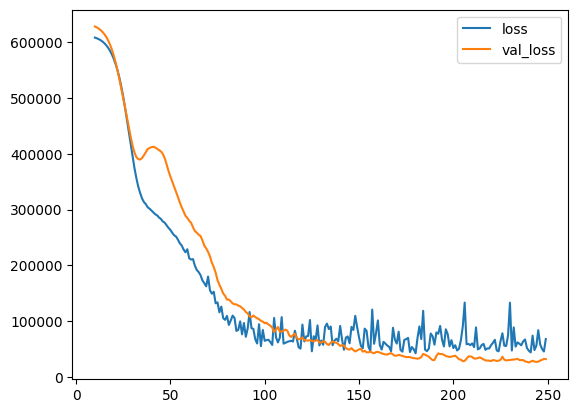

In [24]:

history_df = pd.DataFrame(history.history)
history_df.loc[10:, ['loss', 'val_loss']].plot()